<a href="https://colab.research.google.com/github/hussain0048/Projects-/blob/master/Spam_Detection_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📚Table of Content**



1.   Import Libraries
2.   Data Loading
3.   Data Preprocessing
4.   Data Spliting
5.   Model Training and Testing
6.   References





# **📚Import Libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split , GridSearchCV , KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import PorterStemmer
from sklearn import metrics

# **📚Data Loading**

In [6]:
#URL is change, data with df
df = pd.read_csv("https://raw.githubusercontent.com/Sanjay-dev-ds/spam_ham_email_detector/master/spam.csv", encoding= 'latin-1')
df.head()


,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# **📚Data Preprocessing**

**Remove duplicate values(New)**

In [7]:
df = df.drop_duplicates(keep='first')

**Split into Independent and dependent variable(New)**

From this dataset, class and message are the only features we need to train a machine learning model for spam detection, so let’s select these two columns as the new dataset (old):

In [8]:
x = df['EmailText'].values
y = df['Label'].values

**Text Pre-Processing(New)**

creating a function to lowercase the text, remove special characters, normalize certain words, use stems of words instead of the original form using porter stemmer algorithm(New)

In [9]:
# New
porter_stemmer=PorterStemmer()
def preprocessor(text):

    text=text.lower()
    text=re.sub("\\W"," ",text)
    text=re.sub("\\s+(in|the|all|for|and|on)\\s+"," _connector_ ",text)
    words=re.split("\\s+",text)
    stemmed_words=[porter_stemmer.stem(word=word) for word in words]
    return ' '.join(stemmed_words)

creating tokenizer function to

Create a space between special characters

Split based on whitespace (New)

In [10]:
# new
def tokenizer(text):
    text=re.sub("(\\W)"," \\1 ",text)
    return re.split("\\s+",text)

**Feature extraction**

In order to use textual data for predictive modeling, the text must be parsed to remove certain words – this process is called tokenization. These words need to then be encoded as integers, or floating-point values, for use as inputs in machine learning algorithms. This process is called feature extraction (or vectorization).

Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

Count Vectorizer is used to transform a corpus of text to a vector of term.

min_df = 0.06 ( taking 0.6% of Minimum Document Frequency )

ngram_range=(1,2) ( word level Unigrams and bigrams) (NEW)

In [11]:
# new
vectorizer = CountVectorizer(tokenizer=tokenizer,ngram_range=(1,2),min_df=0.006,preprocessor=preprocessor)
x  = vectorizer.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [13]:
print(x)

  (0, 149)	1
  (0, 331)	1
  (0, 313)	1
  (0, 17)	1
  (0, 285)	1
  (0, 155)	1
  (0, 128)	1
  (0, 403)	1
  (0, 154)	1
  (0, 453)	1
  (0, 0)	1
  (1, 0)	1
  (1, 308)	1
  (1, 230)	1
  (1, 433)	1
  (2, 17)	1
  (2, 141)	1
  (2, 8)	1
  (2, 29)	1
  (2, 412)	3
  (2, 474)	1
  (2, 260)	1
  (2, 392)	1
  (2, 345)	1
  (2, 432)	1
  :	:
  (5166, 46)	1
  (5166, 315)	1
  (5167, 17)	3
  (5167, 141)	1
  (5167, 412)	1
  (5167, 190)	2
  (5167, 172)	1
  (5167, 217)	1
  (5167, 459)	1
  (5167, 105)	1
  (5167, 239)	1
  (5167, 372)	1
  (5167, 62)	1
  (5167, 400)	1
  (5167, 292)	1
  (5167, 112)	1
  (5167, 441)	1
  (5167, 73)	1
  (5167, 374)	1
  (5167, 75)	1
  (5167, 74)	1
  (5167, 161)	1
  (5168, 412)	1
  (5168, 217)	2
  (5168, 286)	1


**Check Data is imbalanced (New)**

<Axes: xlabel='count', ylabel='Label'>

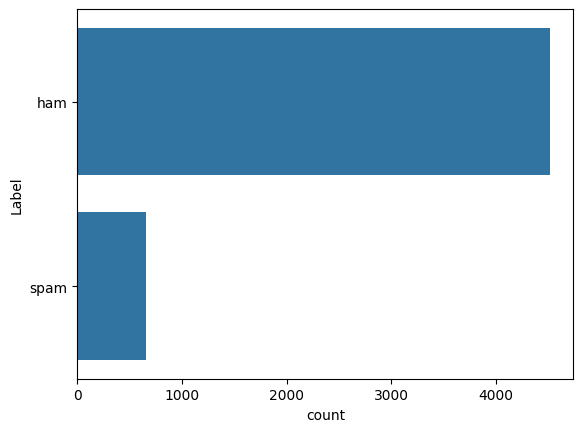

In [14]:
sns.countplot(df['Label'])

target class has an uneven distribution of observations, So we are using random over sampling method to balance the target variable’s observation

Random Oversampling: randomly duplicate examples in the minority class (Spam) (NEW)

In [15]:
# NEW
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

print('Original dataset shape', Counter(y))

# fit predictor and target
x,y = ros.fit_resample(x, y)

print('Modified dataset shape', Counter(y))

Original dataset shape Counter({'ham': 4516, 'spam': 653})
Modified dataset shape Counter({'ham': 4516, 'spam': 4516})


# **📚Data Spliting**

In [16]:
# New
x_train , x_test , y_train , y_test   = train_test_split(x, y, test_size =0.2,random_state = 0)

#**📚Model Training and Testing**

**NB Model**

In [17]:
clf = MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB()

**Accuracy**

In [21]:
# New
y_pred_NB = clf.predict(x_test)
NB_Acc=clf.score(x_test, y_test)
print('Accuracy score= {:.4f}'.format(clf.score(x_test, y_test)))

Accuracy score= 0.9590


Now let’s test this model by taking a user input as a message to detect whether it is spam or not:



In [23]:
# New
sample = input('Enter a message:')
data = vectorizer.transform([sample]).toarray()
print(clf.predict(data))

Enter a message:gfdgdfg
['ham']


**SVM(NEW)**

In [24]:
model   = SVC(C =1,kernel = "linear" )
model.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [25]:
accuracy = metrics.accuracy_score(y_test, model.predict(x_test))
accuracy_percentage = 100 * accuracy
accuracy_percentage

98.83785279468734

# **Hyperparameter Optimization using Grid Search CV(New)**

**SVM**

In [26]:
params  = {"C":[0.2,0.5] , "kernel" : ['linear', 'sigmoid'] }


In [27]:
cval = KFold(n_splits = 2)
model =  SVC();
TunedModel = GridSearchCV(model,params,cv= cval)
TunedModel.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.2, 0.5], 'kernel': ['linear', 'sigmoid']})

In [28]:
accuracy = metrics.accuracy_score(y_test, TunedModel.predict(x_test))
accuracy_percentage = 100 * accuracy
accuracy_percentage

99.0038738240177

**NB**

In [31]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
params = {
    'alpha': [0.1, 0.5, 1.0],  # Different values for alpha
    'fit_prior': [True, False]  # Whether to fit class prior probabilities
}

cval = KFold(n_splits=2)
model = MultinomialNB()  # Using Multinomial Naive Bayes
TunedModel1 = GridSearchCV(model, params, cv=cval)
TunedModel1.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
             estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0], 'fit_prior': [True, False]})

In [32]:
accuracy = metrics.accuracy_score(y_test, TunedModel1.predict(x_test))
accuracy_percentage = 100 * accuracy
accuracy_percentage

96.40287769784173

# **Model Evaluation**

**Confusion-svm**

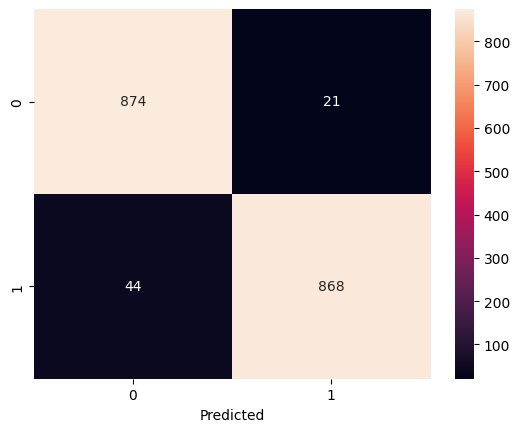

In [33]:
sns.heatmap(confusion_matrix(y_test,TunedModel.predict(x_test)),annot = True , fmt ="g")
plt.xlabel("Predicted")
plt.show("Actual")
plt.show()

**classification report-SVM**

In [34]:
print(classification_report(y_test,TunedModel.predict(x_test)))

              precision    recall  f1-score   support

         ham       0.95      0.98      0.96       895
        spam       0.98      0.95      0.96       912

    accuracy                           0.96      1807
   macro avg       0.96      0.96      0.96      1807
weighted avg       0.96      0.96      0.96      1807



Using the trained model, predict whether the following five emails are spam or ham



In [36]:
mails = ["Hey, you have won a car !!!!. Conrgratzz"
              ,"Dear applicant, Your CV has been recieved. Best regards"
              ,"You have received $1000000 to your account"
              ,"Join with our whatsapp group"
              ,"Kindly check the previous email. Kind Regard"]
for mail in mails:
  is_spam = TunedModel.predict(vectorizer.transform([mail]).toarray())
  print(mail + " : " + str(is_spam))

Hey, you have won a car !!!!. Conrgratzz : ['spam']
Dear applicant, Your CV has been recieved. Best regards : ['spam']
You have received $1000000 to your account : ['spam']
Join with our whatsapp group : ['spam']
Kindly check the previous email. Kind Regard : ['ham']


# **📚References**


1.   [How to Save a Machine Learning Model](https://thecleverprogrammer.com/2021/05/13/how-to-save-a-machine-learning-model/)?
2.   [What's the difference between fit and fit_transform in scikit-learn models?](https://datascience.stackexchange.com/questions/12321/whats-the-difference-between-fit-and-fit-transform-in-scikit-learn-models)

